## Handwritten Project by given book

Open a file

In [1]:
data_file = open("mnist_dataset/mnist_train_100.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [2]:
len(data_list)

100

In [3]:
type(data_list)

list

In [4]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Import necessary libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt

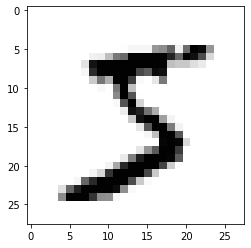

In [6]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

np.asfarray() is a numpy function to convert the text strings into real numbers and to create an array of those numbers.

Select a grayscale color palette with cmap='Greys'

Another example for '0'

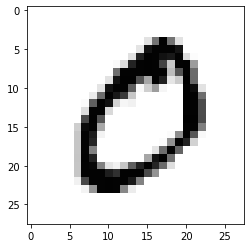

In [7]:
all_values = data_list[1].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

### Preparing the MNIST Training Data
We saw earlier that NN work better if the input data, and also the output values, are of the right shape so that they stay within the comfort zone of the network node activation functions.

The first thing we need to do is rescale the input color balues from the larger range [0 255] to [0.01 1.0]. There are also some details to pay attention

In [ ]:
scaled_input = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
print(scaled_input)

In [9]:
# output nodes is 10(example)
onodes = 10
targets = np.zeros(onodes)+0.01
targets[int(all_values[0])] = 0.09
print(targets)

[0.09 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


## All preparing work done. Let's get started

In [10]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

# Neural network class definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes,
                learningrate):
# set number of nodes in each input, hidden, output layers
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # learning rate
        self.lr = learningrate
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))       
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        # activiation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr*np.dot((output_errors*final_outputs*(1.0-final_outputs)),np.transpose(hidden_outputs))

        # update the weights for the links between the input and hidden layers
        self.wih += self.lr*np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), np.transpose(inputs))
        
        pass        
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [11]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate is 0.3
learning_rate = 0.3

# creating instance of NN
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

Load the traing data csv file into a listmnist 

In [12]:
training_data_file = open("mnist_dataset/mnist_train_100.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

Train the neural network

In [13]:
# go through all records in the training data set
for record in training_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:])/255*0.99)+0.01
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = np.zeros(output_nodes)+0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)

### Training finished, we need to test

In [14]:
# load the mnist test data CVS file into a list
test_data_file = open("mnist_dataset/mnist_test_10.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [15]:
# get the first test record
all_values = test_data_list[0].split(',')
# print the label
print(all_values[0])

7


In [16]:
n.query((np.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([[0.10524218],
       [0.09869692],
       [0.05080188],
       [0.15378986],
       [0.1866106 ],
       [0.06057395],
       [0.04121811],
       [0.43970745],
       [0.12738203],
       [0.08237924]])

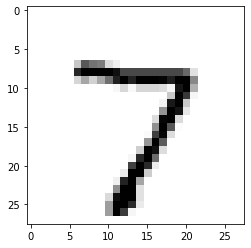

In [17]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation = 'None')

### Perform against the rest of test set

In [18]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    print(correct_label, "correct_label")
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:])/255*0.99)+0.01
    # query the network
    outputs= n.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    print(label, "network' answer")
    # append correct or incorrect to list
    if (label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

7 correct_label
7 network' answer
2 correct_label
3 network' answer
1 correct_label
1 network' answer
0 correct_label
0 network' answer
4 correct_label
4 network' answer
1 correct_label
1 network' answer
4 correct_label
4 network' answer
9 correct_label
1 network' answer
5 correct_label
1 network' answer
9 correct_label
7 network' answer


In [19]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [21]:
# calculate the performance score, the fraction of correcrt answers
scorecard_array = np.asarray(scorecard)
print("performance =", scorecard_array.sum()/scorecard_array.size)

performance = 0.6


### We can also train NN by full dataset and test, but omit here